# 1. Import Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mdtraj as md
import dmaps
from numpy import matlib as mb

# 2. Load Trajectories

In [7]:
traj = np.loadtxt('h2t series.txt', delimiter=',')

In [8]:
traj.shape

(50001,)

# 3. False Nearest Neighbors

Enter the delay time T:2
Enter the largest dimenstion D you want test:25
d=0.000000

d=1.000000

d=2.000000

d=3.000000

d=4.000000

d=5.000000

d=6.000000

d=7.000000

d=8.000000

d=9.000000

d=10.000000

d=11.000000

d=12.000000

d=13.000000

d=14.000000

d=15.000000

d=16.000000

d=17.000000

d=18.000000

d=19.000000

d=20.000000

d=21.000000

d=22.000000

d=23.000000

d=24.000000



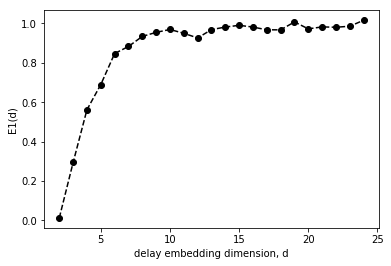

In [6]:
# This function is to compute the E1 measurement in FNN algorithm to
# identify the optima delay dimension.

T = input('Enter the delay time T:') #input delay time
T = int(T)
length = len(traj)
M = traj 

def FNN(M):
    D = input('Enter the largest dimenstion D you want test:') #determin range of testing dimension 
    D = int(D)
    E1 = np.zeros(D)
    E2 = np.zeros(D)
    length = len(M)
    
    
    for m in range(D):
        print('d=%f\n'%m)
        e,es = E(m) # pick out E(d),E*(d)
        (e1,es1) = E(m+1) # pick out E(d+1),E*(d+1)
        E1[m] = e1/e #E1(d),E1 is actually increasing it's dimension as m increasing
        E2[m] = es1/es #E2(d)
    
    np.savetxt('E1.dat', E1)
    np.savetxt('E2.dat', E2)
    
    fig, ax = plt.subplots()
    ax.plot(range(D), E1, 'k--', marker='o')
#     ax.plot(range(1,D+1,1), E2, 'k--', marker='o')
    ax.set_xlabel("delay embedding dimension, d")
    ax.set_ylabel("E1(d)") 
    
    plt.draw()
    plt.show()
        
def innerfun(i,d): #define inner function
    J = 0
    mi = np.inf  #preset the minimum norm for nearest neighbor
    for j in range(length-d*T): # scan over all snapshot to caculate norm with i
        ma = 0
        for k in range(d-1): # scan over all d components
            if abs(M[j+k*T]-M[i+k*T])>ma: # select the real maximum component 
                ma = abs(M[j+k*T]-M[i+k*T])
        if ma!= 0:
            if ma < mi: # find the real minimum norm, determine the nearest neighbor
                mi = ma
                J = j # pick out # of nearest neighbor of i
    
    a = max(mi,abs(M[i+d*T]-M[J+d*T]))/mi # output new norm in d+1 dimension for this nearest pair
    b = abs(M[i+d*T]-M[J+d*T]) #out put the subtraction of new component of this nearest pair 
        
    return a,b


def E(d): # define the function for doing summation and average
    temp1 = 0 #temp for E
    temp2 = 0 #temp for E*
    
    for l in range(length-int(d*T)): #sum over this range
        (p,q) = innerfun(l,d) #pick out two value from function a
        temp1 = temp1 + p # make sum
        temp2 = temp2 + q       
   
    temp1 = temp1/(length-d*T) #average
    temp2 = temp2/(length-d*T);
   
    E = temp1 #out put E
    Es = temp2 #out put E*
    
    return E,Es

FNN(traj)